In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Nadam, Adamax, Adagrad, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint



In [32]:
import os
base_dir ="C:/Users/chundie/Desktop/OriginalDataset"
img_size = (224, 224)

In [33]:
x=[]
y=[]

In [34]:
from tensorflow.keras.utils import load_img, img_to_array
for label in os.listdir(base_dir):
    label_path = os.path.join(base_dir, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                # Chargement de l'image et redimensionnement
                img = load_img(file_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalisation
                x.append(img_array)
                y.append(label)  # Nom du dossier = classe
            except Exception as e:
                print(f"Erreur avec {file_path} : {e}")

In [35]:
# Conversion en numpy array
x = np.array(x, dtype="float32")
y = np.array(y)

In [36]:
# Encodage des labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [37]:
x.shape

(6400, 224, 224, 3)

In [38]:
y.shape

(6400,)

In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=42)


In [40]:
x_train=x_train[:1000]
y_train=y_train[:1000]
x_train=x_train.astype('float32')
x_train = tf.image.resize(x_train, [224, 224]).numpy()

In [41]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [42]:
y_train

array([3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2,
       2, 0, 2, 2, 3, 3, 2, 0, 0, 3, 2, 3, 3, 2, 0, 0, 2, 2, 3, 0, 2, 2,
       0, 0, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 0, 2, 2, 0, 3, 3, 0, 2,
       0, 2, 3, 2, 3, 0, 2, 2, 2, 3, 2, 3, 3, 3, 0, 2, 2, 3, 2, 3, 2, 2,
       0, 2, 0, 2, 3, 0, 0, 2, 2, 2, 0, 0, 3, 2, 0, 3, 0, 2, 3, 3, 2, 2,
       0, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 0,
       2, 0, 2, 2, 2, 2, 2, 0, 3, 3, 2, 3, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2,
       3, 0, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 0, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3,
       0, 3, 2, 2, 0, 0, 0, 3, 3, 3, 3, 2, 1, 0, 2, 3, 0, 2, 0, 3, 3, 2,
       3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2,

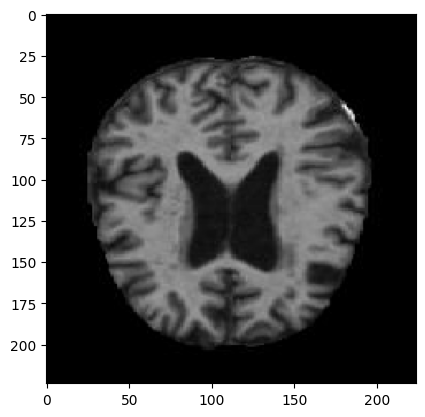

In [43]:
import matplotlib.pyplot as plt
for i in range(0,3):
    plt.imshow(x_test[i],cmap='grey')
    plt.show

In [44]:
x_train=np.expand_dims(x_train,axis=3)
x_test=np.expand_dims(x_test,axis=3)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)


(1000, 224, 224, 1, 3)
(960, 224, 224, 1, 3)
(1000,)


In [46]:
# Normalisation:
train_images = x_train.astype("float32") / 255
test_images = x_test.astype("float32") / 255


In [47]:
x_train=np.squeeze(x_train)
x_test=np.squeeze(x_test)
print(x_train.shape)
print(x_test.shape)

(1000, 224, 224, 3)
(960, 224, 224, 3)


In [48]:
from tensorflow.keras.regularizers import l1,l2
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.regularizers import l2
from keras import layers
from keras.applications import ResNet50

# 3. Charger ResNet50 sans la partie classification (top), avec les poids ImageNet
base_model =ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 4. Geler les couches convolutionnelles
for layer in base_model.layers:
    layer.trainable = False

# 5. Ajouter le classifieur personnalisé



model = Sequential([
    base_model,
    Flatten(),
    BatchNormalization(),
    Dense(500, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(300, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100352)         │       401,408 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │    50,176,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,363,866 (283.68 MB)

 Trainable params: 50,575,194 (192.93 MB)

 Non-trainable params: 23,788,672 (90.75 MB)

In [49]:
sgd = tf.keras.optimizers.SGD(0.01)
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
nadam = tf.keras.optimizers.Nadam()
adamax = tf.keras.optimizers.Adamax()
adagrad = tf.keras.optimizers.Adagrad()
RMSprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)


In [50]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [51]:
model.compile(
    optimizer=adam,
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [52]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [53]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [54]:
print(type(y_train))
print(y_train.dtype)
print(y_train[:5])

<class 'numpy.ndarray'>
int64
[3 3 2 2 2]


In [55]:
print(type(x_train))
print(type(x_train[0]))
print(x_train[0].shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(224, 224, 3)


In [56]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=10, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss',patience=20, restore_best_weights=True)

checkpoint_path = 'C:/Users/chundie/Desktop/pfa fatima/best_model.h5'

checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy',save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=100,batch_size=500, validation_split=0.2,callbacks=[reduce_lr,early_stopping, checkpoint])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1934 - loss: 3.9684  
Epoch 1: val_accuracy improved from None to 0.02000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 10s/step - accuracy: 0.2087 - loss: 3.8820 - val_accuracy: 0.0200 - val_loss: 3.5951 - learning_rate: 0.0010
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2965 - loss: 3.2597
Epoch 2: val_accuracy improved from 0.02000 to 0.05500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.3050 - loss: 3.2212 - val_accuracy: 0.0550 - val_loss: 4.2221 - learning_rate: 0.0010
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3894 - loss: 2.8163
Epoch 3: val_accuracy improved from 0.05500 to 0.31500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.3887 - loss: 2.8129 - val_accuracy: 0.3150 - val_loss: 3.9753 - learning_rate: 0.0010
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4011 - loss: 2.6037
Epoch 4: val_accuracy improved from 0.31500 to 0.38000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 9s/step - accuracy: 0.4162 - loss: 2.5833 - val_accuracy: 0.3800 - val_loss: 3.7458 - learning_rate: 0.0010
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4334 - loss: 2.4790
Epoch 5: val_accuracy did not improve from 0.38000
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.4387 - loss: 2.4691 - val_accuracy: 0.3800 - val_loss: 3.2997 - learning_rate: 0.0010
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4500 - loss: 2.4165
Epoch 6: val_accuracy improved from 0.38000 to 0.41500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 11s/step - accuracy: 0.4600 - loss: 2.3890 - val_accuracy: 0.4150 - val_loss: 3.1052 - learning_rate: 0.0010
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5447 - loss: 2.3236 
Epoch 7: val_accuracy improved from 0.41500 to 0.42000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step - accuracy: 0.5375 - loss: 2.3198 - val_accuracy: 0.4200 - val_loss: 2.8820 - learning_rate: 0.0010
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5370 - loss: 2.2520  
Epoch 8: val_accuracy did not improve from 0.42000
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - accuracy: 0.5500 - loss: 2.2372 - val_accuracy: 0.4200 - val_loss: 2.6654 - learning_rate: 0.0010
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5215 - loss: 2.2052  
Epoch 9: val_accuracy did not improve from 0.42000
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - accuracy: 0.5250 - loss: 2.1903 - val_accuracy: 0.4200 - val_loss: 2.5656 - learning_rate: 0.0010
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5863 - loss: 2.0699  
Epoch 10: val_accuracy improved from 0.42000 to 0.42500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step - accuracy: 0.5725 - loss: 2.0830 - val_accuracy: 0.4250 - val_loss: 2.5660 - learning_rate: 0.0010
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5447 - loss: 2.0326
Epoch 11: val_accuracy improved from 0.42500 to 0.43500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.5475 - loss: 2.0524 - val_accuracy: 0.4350 - val_loss: 2.5625 - learning_rate: 0.0010
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5596 - loss: 1.9726
Epoch 12: val_accuracy improved from 0.43500 to 0.44000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.5612 - loss: 1.9695 - val_accuracy: 0.4400 - val_loss: 2.5406 - learning_rate: 0.0010
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5745 - loss: 1.9394
Epoch 13: val_accuracy improved from 0.44000 to 0.45000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.5750 - loss: 1.9292 - val_accuracy: 0.4500 - val_loss: 2.4864 - learning_rate: 0.0010
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5812 - loss: 1.8939
Epoch 14: val_accuracy improved from 0.45000 to 0.47000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 12s/step - accuracy: 0.5725 - loss: 1.9036 - val_accuracy: 0.4700 - val_loss: 2.4478 - learning_rate: 0.0010
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5874 - loss: 1.8886  
Epoch 15: val_accuracy improved from 0.47000 to 0.48000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 12s/step - accuracy: 0.5888 - loss: 1.8820 - val_accuracy: 0.4800 - val_loss: 2.4230 - learning_rate: 0.0010
Epoch 16/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5815 - loss: 1.8912
Epoch 16: val_accuracy did not improve from 0.48000
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.5850 - loss: 1.8777 - val_accuracy: 0.4750 - val_loss: 2.3892 - learning_rate: 0.0010
Epoch 17/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5891 - loss: 1.8193
Epoch 17: val_accuracy improved from 0.48000 to 0.49000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.5962 - loss: 1.8057 - val_accuracy: 0.4900 - val_loss: 2.3652 - learning_rate: 0.0010
Epoch 18/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6004 - loss: 1.7837 
Epoch 18: val_accuracy did not improve from 0.49000
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 11s/step - accuracy: 0.5987 - loss: 1.7729 - val_accuracy: 0.4800 - val_loss: 2.3609 - learning_rate: 0.0010
Epoch 19/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6186 - loss: 1.7808  
Epoch 19: val_accuracy did not improve from 0.49000
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 11s/step - accuracy: 0.6112 - loss: 1.7884 - val_accuracy: 0.4750 - val_loss: 2.3691 - learning_rate: 0.0010
Epoch 20/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6114 - loss: 1.7326 
Epoch 20: val_accuracy did not improve from 0.49000
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.6087 - loss: 1.7348 - val_accuracy: 0.4700 - val_loss: 2.3482 - learning_rate: 0.0010
Epoch 21/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 

2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.6375 - loss: 1.6688 - val_accuracy: 0.5050 - val_loss: 2.1921 - learning_rate: 0.0010
Epoch 25/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6395 - loss: 1.6438 
Epoch 25: val_accuracy did not improve from 0.50500
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 11s/step - accuracy: 0.6350 - loss: 1.6523 - val_accuracy: 0.5050 - val_loss: 2.1698 - learning_rate: 0.0010
Epoch 26/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6649 - loss: 1.6377  
Epoch 26: val_accuracy improved from 0.50500 to 0.54000, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 11s/step - accuracy: 0.6737 - loss: 1.6221 - val_accuracy: 0.5400 - val_loss: 2.1579 - learning_rate: 0.0010
Epoch 27/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6640 - loss: 1.6227
Epoch 27: val_accuracy did not improve from 0.54000
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.6600 - loss: 1.6148 - val_accuracy: 0.5250 - val_loss: 2.1393 - learning_rate: 0.0010
Epoch 28/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6215 - loss: 1.6353
Epoch 28: val_accuracy did not improve from 0.54000
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.6350 - loss: 1.6272 - val_accuracy: 0.5250 - val_loss: 2.1234 - learning_rate: 0.0010
Epoch 29/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6854 - loss: 1.5517
Epoch 29: val_accuracy did not improve from 0.54000
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.6888 - loss: 1.5550 - val_accuracy: 0.5100 - val_loss: 2.1179 - learning_rate: 0.0010
Epoch 30/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/st

2/2 ━━━━━━━━━━━━━━━━━━━━ 23s 12s/step - accuracy: 0.7475 - loss: 1.3878 - val_accuracy: 0.5550 - val_loss: 2.0307 - learning_rate: 0.0010
Epoch 39/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7665 - loss: 1.3418  
Epoch 39: val_accuracy improved from 0.55500 to 0.57500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 12s/step - accuracy: 0.7650 - loss: 1.3466 - val_accuracy: 0.5750 - val_loss: 1.9861 - learning_rate: 0.0010
Epoch 40/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7731 - loss: 1.3334 
Epoch 40: val_accuracy did not improve from 0.57500
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step - accuracy: 0.7763 - loss: 1.3342 - val_accuracy: 0.5500 - val_loss: 1.9729 - learning_rate: 0.0010
Epoch 41/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7854 - loss: 1.2910
Epoch 41: val_accuracy did not improve from 0.57500
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.7887 - loss: 1.2788 - val_accuracy: 0.5600 - val_loss: 1.9807 - learning_rate: 0.0010
Epoch 42/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7806 - loss: 1.3037
Epoch 42: val_accuracy did not improve from 0.57500
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 9s/step - accuracy: 0.7812 - loss: 1.2966 - val_accuracy: 0.5500 - val_loss: 1.9989 - learning_rate: 0.0010
Epoch 43/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/s

2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step - accuracy: 0.9563 - loss: 0.8604 - val_accuracy: 0.5800 - val_loss: 1.7769 - learning_rate: 0.0010
Epoch 62/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9638 - loss: 0.8200
Epoch 62: val_accuracy improved from 0.58000 to 0.59500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step - accuracy: 0.9575 - loss: 0.8329 - val_accuracy: 0.5950 - val_loss: 1.7370 - learning_rate: 0.0010
Epoch 63/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9664 - loss: 0.8128
Epoch 63: val_accuracy did not improve from 0.59500
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.9588 - loss: 0.8350 - val_accuracy: 0.5850 - val_loss: 1.8165 - learning_rate: 0.0010
Epoch 64/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9601 - loss: 0.8010
Epoch 64: val_accuracy did not improve from 0.59500
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.9563 - loss: 0.8083 - val_accuracy: 0.5950 - val_loss: 1.8380 - learning_rate: 0.0010
Epoch 65/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9564 - loss: 0.8355
Epoch 65: val_accuracy improved from 0.59500 to 0.61500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step - accuracy: 0.9588 - loss: 0.8286 - val_accuracy: 0.6150 - val_loss: 1.7519 - learning_rate: 0.0010
Epoch 66/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9649 - loss: 0.7956
Epoch 66: val_accuracy improved from 0.61500 to 0.62500, saving model to C:/Users/chundie/Desktop/pfa fatima/best_model.h5


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step - accuracy: 0.9638 - loss: 0.7931 - val_accuracy: 0.6250 - val_loss: 1.6479 - learning_rate: 0.0010
Epoch 67/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9697 - loss: 0.7959
Epoch 67: val_accuracy did not improve from 0.62500
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.9675 - loss: 0.7971 - val_accuracy: 0.6050 - val_loss: 1.7018 - learning_rate: 0.0010
Epoch 68/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9646 - loss: 0.7928
Epoch 68: val_accuracy did not improve from 0.62500
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.9613 - loss: 0.7992 - val_accuracy: 0.5750 - val_loss: 1.8177 - learning_rate: 0.0010
Epoch 69/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9663 - loss: 0.7799
Epoch 69: val_accuracy did not improve from 0.62500
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 9s/step - accuracy: 0.9625 - loss: 0.7856 - val_accuracy: 0.6000 - val_loss: 1.7344 - learning_rate: 0.0010
Epoch 70/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/st

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy sur l’ensemble de test :", test_acc)


30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 536ms/step - accuracy: 0.6000 - loss: 1.6985
Accuracy sur l’ensemble de test : 0.6000000238418579


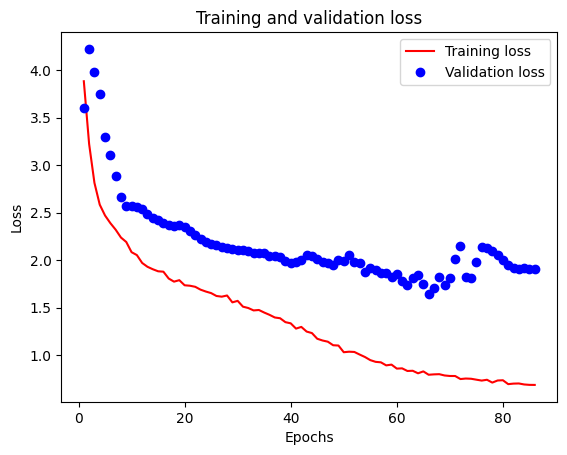

In [58]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "bo", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

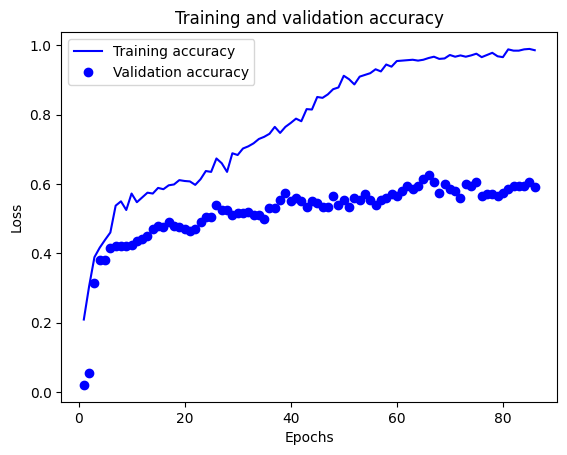

In [59]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "b", label="Training accuracy")
plt.plot(epochs, val_loss_values, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 511ms/step
y_pred shape: (960,)
y_test shape: (960,)
** Confusion Matrix **


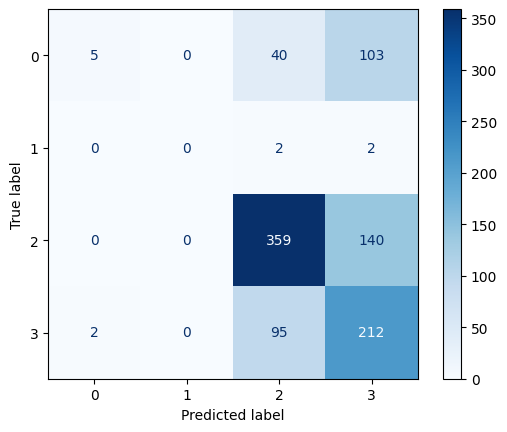

** Accuracy globale **: 0.6
** Precision globale **: 0.4754927510109006
** Recall globale **: 0.3598267009835292
** Classification Report **
              precision    recall  f1-score   support

     Class 0       0.71      0.03      0.06       148
     Class 1       0.00      0.00      0.00         4
     Class 2       0.72      0.72      0.72       499
     Class 3       0.46      0.69      0.55       309

    accuracy                           0.60       960
   macro avg       0.48      0.36      0.33       960
weighted avg       0.64      0.60      0.56       960



c:\Users\chundie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\chundie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\chundie\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# predictions
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

# Confusion Matrix
print("** Confusion Matrix **")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

# Scores globaux
print("** Accuracy globale **:", accuracy_score(y_test, y_pred))
print("** Precision globale **:", precision_score(y_test, y_pred, average='macro'))
print("** Recall globale **:", recall_score(y_test, y_pred, average='macro'))

# Rapport détaillé par class
print("** Classification Report **")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1", "Class 2", "Class 3"]))